In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.6 anndata==0.9.2 umap==0.5.5 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.11
squidpy==1.2.3


In [2]:
adata_st = sq.datasets.visium_fluo_adata_crop()
adata_st = adata_st[
    adata_st.obs.cluster.isin([f"Cortex_{i}" for i in np.arange(1, 5)])
].copy()
img = sq.datasets.visium_fluo_image_crop()

adata_sc = sq.datasets.sc_mouse_cortex()

100%|██████████| 65.5M/65.5M [00:01<00:00, 62.3MB/s]
100%|██████████| 303M/303M [00:04<00:00, 75.0MB/s] 
100%|██████████| 3.03G/3.03G [00:44<00:00, 73.7MB/s]


In [3]:
adata_st.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster
AAATGGCATGTCTTGT-1,1,13,69,5191,8.554874,15977.0,9.678968,20.629655,26.757213,34.743694,48.889028,0.0,0.0,0.0,15977.0,0,Cortex_1
AACAACTGGTAGTTGC-1,1,28,42,5252,8.566555,16649.0,9.720165,20.481711,26.277855,34.092138,48.201093,0.0,0.0,0.0,16649.0,0,Cortex_1
AACAGGAAATCGAATA-1,1,15,67,6320,8.751633,23375.0,10.059465,17.929412,23.850267,32.077005,45.963636,0.0,0.0,0.0,23375.0,0,Cortex_1
AACCCAGAGACGGAGA-1,1,15,39,3659,8.205218,9229.0,9.130215,25.939972,31.964460,39.885145,53.212699,0.0,0.0,0.0,9229.0,1,Cortex_2
AACCGTTGTGTTTGCT-1,1,12,64,4512,8.414717,12679.0,9.447782,21.839262,28.038489,36.209480,50.540263,0.0,0.0,0.0,12679.0,0,Cortex_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGATTGGGTACCAC-1,1,17,55,4980,8.513386,15381.0,9.640953,21.038944,27.059359,35.114752,49.197061,0.0,0.0,0.0,15381.0,0,Cortex_1
TTGGCTCGCATGAGAC-1,1,23,37,4620,8.438366,13193.0,9.487517,20.609414,26.445842,34.063519,48.442356,0.0,0.0,0.0,13193.0,5,Cortex_3
TTGTATCACACAGAAT-1,1,12,74,6120,8.719481,21951.0,9.996614,18.199626,24.235798,32.440436,46.663022,0.0,0.0,0.0,21951.0,0,Cortex_1
TTGTGGCCCTGACAGT-1,1,18,60,4971,8.511577,14779.0,9.601030,21.381690,27.924758,36.213546,49.780093,0.0,0.0,0.0,14779.0,0,Cortex_1


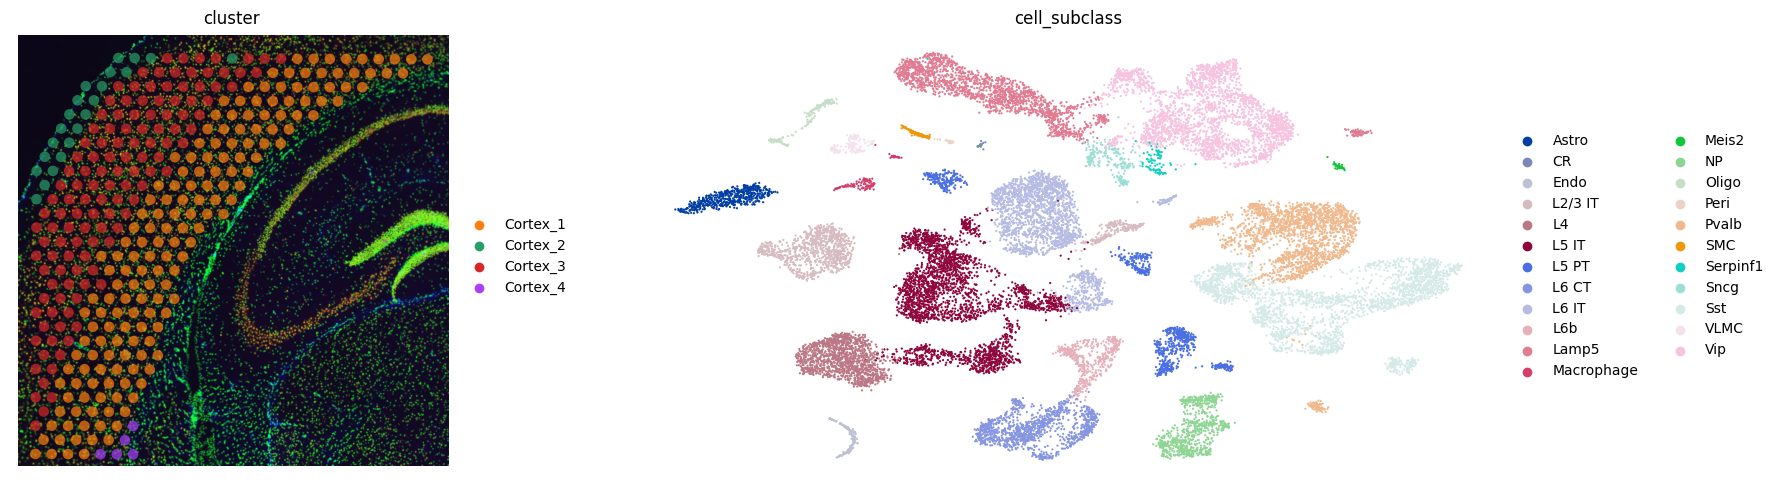

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sc.pl.spatial(
    adata_st, color="cluster", alpha=0.7, frameon=False, show=False, ax=axs[0]
)
sc.pl.umap(
    adata_sc, color="cell_subclass", size=10, frameon=False, show=False, ax=axs[1]
)
plt.tight_layout()

In [5]:
sc.tl.rank_genes_groups(adata_sc, groupby="cell_subclass", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1401

In [ ]:
tg.pp_adatas(adata_sc, adata_st, genes=markers)